In [77]:
from scipy.io import loadmat
from scipy.signal import butter, filtfilt
from pathlib import Path
import numpy as np
import re
from numpy.typing import NDArray
import os
from itertools import islice
import matplotlib.pyplot as plt
import math
from dataclasses import dataclass
from dataclasses import replace
import plotly.express as px
import panel as pn
pn.extension('tabulator','plotly')

In [63]:
fig = px.scatter()

In [64]:
print(fig)

Figure({
    'data': [{'hovertemplate': '<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})


In [65]:
rng = np.random.default_rng()
x = rng.standard_normal(5)
y = rng.standard_normal(5)
c = rng.standard_normal(5)

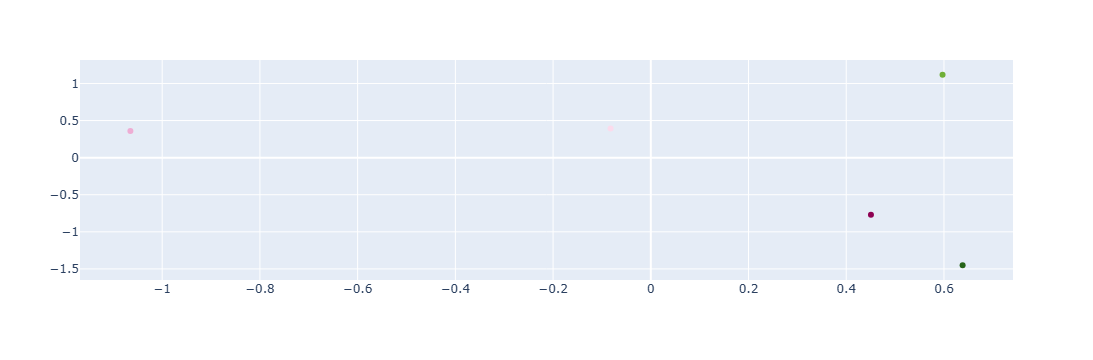

In [66]:
fig.add_scatter(x=x, y=y, name='data1',marker=dict(color=c),
                            mode='markers', # 'markers' mode seems to be memory intensive
                            hovertext=['data1']*len(x)
                            )

In [61]:
print(fig)

Figure({
    'data': [{'hovertemplate': '<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'xaxis': 'x',
              'yaxis': 'y'},
             {'hovertext': [data1, data1, data1, data1, data1],
              'mode': 'markers',
              'name': 'data1',
              'type': 'scatter',
              'x': array([-0.52645936,  1.89900302, -1.75768469, -0.73459828,  0.51144707]),
              'y': array([-0.17280038,  0.78861132,  0.41547554, -0.8788401 ,  0.36914735])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})


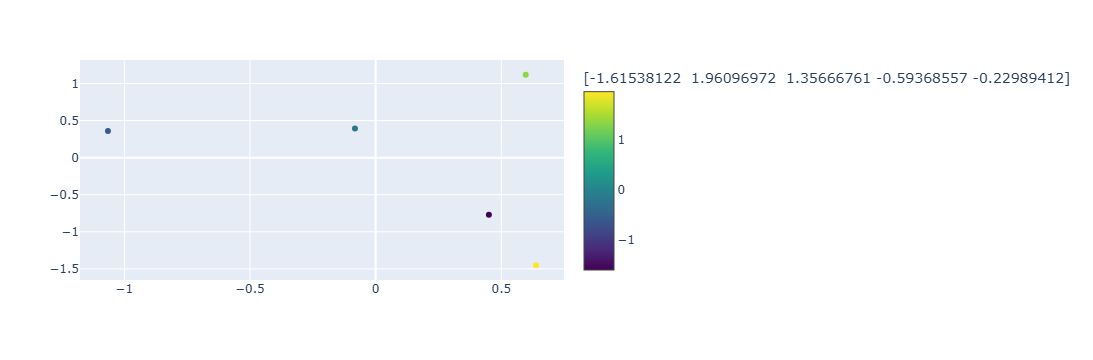

In [70]:
fig.update_traces(hovertemplate = f"<b>%{{hovertext}}</b><br>x: %{{x:.2f}}<br>y: %{{y:.2f}}<br>c: %{{marker.color:.2f}}<extra></extra>",
                     marker=dict(cmin = min(c), cmax=max(c), colorscale='Viridis', 
                                                showscale=True, 
                                                colorbar=dict(title=f'{c}'),))

In [116]:
px.colors.sequential.Jet

['rgb(0,0,131)',
 'rgb(0,60,170)',
 'rgb(5,255,255)',
 'rgb(255,255,0)',
 'rgb(250,0,0)',
 'rgb(128,0,0)']

In [115]:
np.linspace(0.01,1,10)

array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])

In [ ]:
{0.01:'#010179',
 0.12:'#022291',
 0.23:'#0450b2',
 0.34:'#0aa5c1',
 0.45:'#4ffdc8',
 0.56:'#c8ff3a',
 0.67:'#ffaf02',
 0.78:'#fc1d00',
 0.89:'#c10000',
 1.00:'#810001'
}

In [80]:
print(Reds)

In [78]:
from matplotlib.cm import Reds, Blues, Greens

pn.widgets.ColorMap(options={'Reds': Reds, 'Blues': Blues, 'Greens': Greens}, margin=(0, 0, 100, 0))

ColorMap(margin=(0, 0, 100, 0), options={'Reds': <matplotlib.color...}, value=<matplotlib.colors.LinearS..., value_name='Reds')

In [94]:
fig = px.scatter_3d()

In [95]:
print(fig)

Figure({
    'data': [{'hovertemplate': '<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'template': '...'}
})


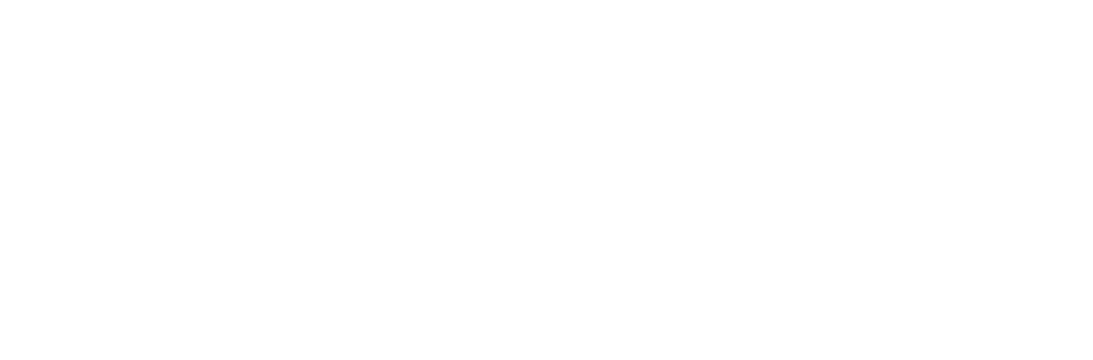

In [98]:
fig.update_layout(scene_zaxis_title_text='something')

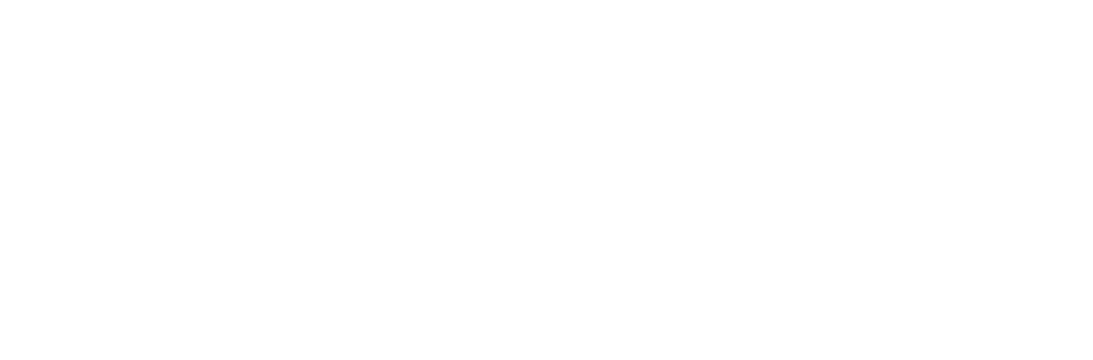

In [99]:
fig

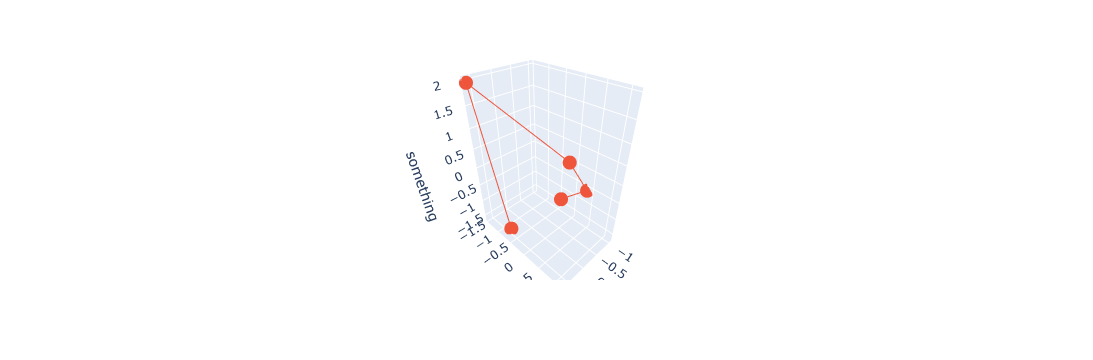

In [100]:
fig.add_scatter3d(x=x, y=y, z=c)

In [126]:
test = np.array([1,1.0,2,2,2,3,3,5,5,1,1])
cmd = [1,5]

test[np.isin(test, cmd)]

array([1., 1., 5., 5., 1., 1.])

In [131]:
x = {'a':1,'b':2, 'c': 3}
y = [1,3]

In [139]:
[v for v in test.keys() if [1] in test.values()]

[]

In [109]:
cmd_select_1.param

Name,Value,Type,Range
align,'start',Align,
"<p style=""margin-bottom: 0px;"" class=""param-doc-tooltip"" data-tooltip=""Describes the proportional relationship between component's width and height. This works if any of component's dimensions are flexible in size. If set to a number, ``width / height = aspect_ratio`` relationship will be maintained. Otherwise, if set to ``""auto""``, component's preferred width and height will be used to determine the aspect (if not set, no aspect will be preserved)."">aspect_ratio",None,Aspect,nullable
css_classes,[],List,"(0, None)"
description,None,String,nullable
design,None,Selector,None
disabled,False,Boolean,
disabled_options,[],List,"(0, None)"
groups,None,Dict,nullable dict
height,None,Integer,nullable >=0
"<p style=""margin-bottom: 0px;"" class=""param-doc-tooltip"" data-tooltip=""Describes how the component should maintain its height. ``""auto""`` Use component's preferred sizing policy. ``""fixed""`` Use exactly ``height`` pixels. Component will overflow if it can't fit in the available vertical space. ``""fit""`` Use component's preferred height (if set) and allow to fit into the available vertical space within the minimum and maximum height bounds (if set). Component's height neither will be aggressively minimized nor maximized. ``""min""`` Use as little vertical space as possible, not less than the minimum height (if set). The starting point is the preferred height (if set). The height of the component may shrink or grow depending on the parent layout, aspect management and other factors. ``""max""`` Use as much vertical space as possible, not more than the maximum height (if set). The starting point is the preferred height (if set). The height of the component may shrink or grow depending on the parent layout, aspect management and other factors."">height_policy",'auto',Selector,"'auto', 'fixed', 'fit', 'min', 'max'"


In [ ]:
filepath = Path('../data/A2356raw2.dat')


In [ ]:
with open(filepath, "r") as f:
    first_three = list(islice(f, 3))

In [ ]:
first_three

In [ ]:
s = first_three[0]
# Extract Tire_Name
tire_match = re.search(r'Tire_Name=([^;]+)', s)
tire_name = tire_match.group(1) if tire_match else None

# Extract Rim_Width
rim_match = re.search(r'Rim_Width=([^;]+)', s)
rim_width = str(int(float(rim_match.group(1)))) if rim_match else None

In [ ]:
coord_match = re.search(r'Coordinate_System=([^;]+)', first_three[0])
coordinate_system = coord_match.group(1) if coord_match else 'SAE'


In [ ]:
re.search(r'Tire_Name=([^;]+)', s) is None

In [ ]:
channels = first_three[1].strip().split('\t')
units = first_three[2].strip().split('\t')
units

In [ ]:
np.loadtxt(filepath,delimiter='\t',skiprows=3)

In [2]:
@dataclass
class dataset:
    path: os.PathLike
    name: str
    channels: list
    units: list
    unit_types: list
    data: NDArray[np.float64]
    tire_id: str
    rim_width: str
    unit_system: str
    sign_convention: str

In [3]:
def import_mat(filepath):
    # Load the .mat file
    file_data = loadmat(filepath)
    file_name = filepath.stem

    # Extract channel names and units
    channels = np.concatenate(file_data['channel'][0][0][0][0]).ravel().tolist()
    units = np.concatenate(file_data['channel'][0][0][1][0]).ravel().tolist()

    # Stack channel data into a single array
    data = np.column_stack([file_data[chan] for chan in channels])

    # Extract tire ID and rim width
    tire_info = file_data['tireid'][0].split(',')
    tire_id = tire_info[0]

    rim_match = re.search(r"\d+", tire_info[1])
    rim_width = rim_match.group() if rim_match else ''

    # Determine unit system
    unit_system = 'USCS' if 'lb' in units else 'Metric'

    # Determine coordinate system
    coordinate_system = 'SAE' if 'coord' not in file_data.keys() else file_data['coord']
    return dataset(filepath,file_name,channels,units,data,tire_id,rim_width,unit_system,coordinate_system)
    

In [34]:
def import_dat(filepath):
    """
    Imports data from a .dat/.txt file and constructs a dataset object with relevant metadata.

    Parameters:
        filepath (os.PathLike): Path to the .dat/.txt file to import.

    Returns:
        dataset: An instance of the dataset class containing:
            - filepath (os.PathLike): The original file path.
            - file_name (str): The base name of the file without extension.
            - channels (list): List of channel names.
            - units (list): List of units corresponding to each channel.
            - unit_types (list): List of unit types corresponding to each channel.
            - data (np.ndarray): 2D array of channel data.
            - tire_id (str): Tire identifier extracted from the file.
            - rim_width (str): Rim width extracted from the tire ID string.
            - unit_system (str): 'USCS' if units are in pounds, otherwise 'Metric'.
            - sign_convention (str): Extracted sign convention, defaults to 'SAE' if not found.

    Raises:
        Exception: Logs and handles any errors encountered during file import.
    """
    # Load the .dat file
    file_name = filepath.stem

    with open(filepath, "r") as f:
        first_three = list(islice(f, 3))

    # Extract channel names and units
    channels = first_three[1].strip().split('\t')
    units = first_three[2].strip().split('\t')

    # Stack channel data into a single array
    data = np.loadtxt(filepath,delimiter='\t',skiprows=3)

    # Ensure 'SL' channel exists
    if 'SL' not in channels:
        channels.append('SL')
        units.append('none')
        data = np.column_stack([data,np.zeros(len(data),np.float64)])

    # Extract tire ID and rim width
    tire_match = re.search(r'Tire_Name=([^;]+)', first_three[0])
    tire_id = tire_match.group(1) if tire_match else ''

    rim_match = re.search(r'Rim_Width=([^;]+)', first_three[0])
    rim_width = str(int(float(rim_match.group(1)))) if rim_match else ''

    # Determine unit system
    unit_system = 'USCS' if 'lb' in units else 'Metric'

    # Determine sign convention
    sign_match = re.search(r'Sign_Convention=([^;]+)', first_three[0])
    sign_convention = sign_match.group(1) if sign_match else 'SAE'

    # Create command channels if needed
    channels, units, data = CmdChannelGenerator.create_cmd_channels(channels, 
                                                                    units, 
                                                                    data, 
                                                                    unit_system, 
                                                                    sign_convention)
    
    # Map channels to unit types
    unit_types = UnitSystemConverter.map_channels_to_types(channels)
    return dataset(filepath, file_name, channels, units, unit_types, data,
           tire_id, rim_width, unit_system, sign_convention)

In [12]:
class UnitSystemConverter:
    """
    Convert datasets between unit systems (USCS, Metric, SI).
    Also provides mapping from channel names to unit types.
    """

    # Known unit type definitions
    unit_types = {
        "length": ['RL', 'RE'],
        "force": ['FX', 'FY', 'FZ'],
        "torque": ['MX', 'MY', 'MZ'],
        "pressure": ['P'],
        "angle": ['SA', 'IA'],
        "speed": ['V'],
        "rotational_speed": ['N'],
        "temperature": ['RST', 'TSTI', 'TSTC', 'TSTO', 'AmbTmp'],
        "time": ['ET']
    }

    unit_definitions = {
        "length": {
            "SI"    : {"unit": "m", "factor": 1.0, "offset": 0},                  # base
            "Metric": {"unit": "cm", "factor": 0.01, "offset": 0},                # m → cm
            "USCS"  : {"unit": "in", "factor": 0.0254, "offset": 0},              # m → in
        },
        "force": {
            "SI"    : {"unit": "N", "factor": 1.0, "offset": 0},                  # base
            "Metric": {"unit": "N", "factor": 1.0, "offset": 0},                  # N → N
            "USCS"  : {"unit": "lb", "factor": 4.44822, "offset": 0},             # N → lb
        },
        "torque": {
            "SI"    : {"unit": "Nm", "factor": 1.0, "offset": 0},                 # base
            "Metric": {"unit": "Nm", "factor": 1.0, "offset": 0},                 # Nm → Nm
            "USCS"  : {"unit": "ft-lb", "factor": 1.35582, "offset": 0},          # Nm → ft-lb
        },
        "pressure": {
            "SI"    : {"unit": "Pa", "factor": 1.0, "offset": 0},                 # base
            "Metric": {"unit": "kPa", "factor": 0.001, "offset": 0},              # Pa → kPa
            "USCS"  : {"unit": "psi", "factor":6894.76, "offset": 0},             # Pa → psi
        },
        "angle": {
            "SI"    : {"unit": "rad", "factor": 1.0, "offset": 0},                # base
            "Metric": {"unit": "deg", "factor": math.pi/180, "offset": 0},        # rad → deg
            "USCS"  : {"unit": "deg", "factor": math.pi/180, "offset": 0},        # rad → deg
        },
        "speed": {
            "SI"    : {"unit": "m/s", "factor": 1.0, "offset": 0},                # base
            "Metric": {"unit": "kph", "factor": 1000/3600, "offset": 0},          # m/s → kph
            "USCS"  : {"unit": "mph", "factor": 0.44704, "offset": 0},            # m/s → mph
        },
        "rotational_speed": {
            "SI"    : {"unit": "rad/s", "factor": 1.0, "offset": 0},              # base
            "Metric": {"unit": "rpm", "factor": 2 * math.pi/60, "offset": 0},     # rad/s → rpm
            "USCS"  : {"unit": "rpm", "factor": 2 * math.pi/60, "offset": 0},     # rad/s → rpm
        },
        "temperature": {
            "SI"    : {"unit": "deg k", "factor": 1.0, "offset": 0},              # base
            "Metric": {"unit": "deg c", "factor": 1.0, "offset": 273.15},         # K → C
            "USCS"  : {"unit": "deg F", "factor": 5/9, "offset": (255.37,459.67)},# K → F
        },
        "time": {
            "SI"    : {"unit": "sec", "factor": 1.0, "offset": 0},                # base
            "Metric": {"unit": "sec", "factor": 1.0, "offset": 0},                # s → s
            "USCS"  : {"unit": "sec", "factor": 1.0, "offset": 0},                # s → s
        }
    } 

    @classmethod
    def map_channels_to_types(cls, channels: list) -> list:
        """
        Map each channel name to its unit type based on predefined dictionary.
        
        Args:
            channels: list of channel names

        Returns:
            list of unit types, aligned with input channels
        """

        # Build reverse lookup {channel -> unit_type}
        channel_to_type = {
            ch: t for t, chs in cls.unit_types.items() for ch in chs
        }

        # Map channels, use "none" if not found
        return [channel_to_type.get(ch, "none") for ch in channels]
    
    @classmethod
    def convert_dataset(cls, dataset, to_system: str):
        """
        Convert dataset between unit systems if unit type is known.

        Args:
            dataset: The dataset to convert.
            to_system: "USCS" | "Metric" | "SI"

        Returns:
            dataset: The converted dataset with updated units and data.
        """

        from_system = dataset.unit_system
        if from_system == to_system:
            return dataset
        
        converted_data = dataset.data.copy()
        updated_units = []

        #logger.info(f"Converting {dataset.name} from {from_system} to {to_system}")
        for i, utype in enumerate(dataset.unit_types):
            if utype == "none":
                updated_units.append("none")
                continue

            # Get definitions
            defs = cls.unit_definitions[utype]

            from_def = defs[from_system]
            to_def = defs[to_system]

            # Handle temperature offset
            if isinstance(from_def["offset"], tuple):
                from_offset = from_def["offset"][0]
                to_offset = to_def["offset"]
            elif isinstance(to_def["offset"], tuple):
                from_offset = from_def["offset"]
                to_offset = to_def["offset"][1]
            else:
                from_offset = from_def["offset"]
                to_offset = to_def["offset"]

            if from_def["unit"] == to_def["unit"]:
                # No conversion needed
                converted_data[:, i] = converted_data[:, i] - from_offset
                updated_units.append(to_def["unit"])
                continue

            # Convert to SI (base)
            values_si = (converted_data[:, i] * from_def["factor"]) + from_offset

            # Convert SI → target
            converted_data[:, i] = (values_si / to_def["factor"]) - to_offset

            updated_units.append(to_def["unit"])

        # Update dataset with new unit system and converted data
        dataset.data = converted_data 
        dataset.unit_system = to_system
        dataset.units = updated_units

        #logger.info(f"Conversion complete: {dataset.name} now in {to_system} system")
        return dataset

In [35]:
class CmdChannelGenerator:
    cmd_target = {
        'V': {
            'USCS': [0, 2, 15, 25, 45],
            'Metric': [0, 3.2, 24.1, 40.2, 72.4]
        },
        'P': {
            'USCS': [0, 8, 10, 12, 14],
            'Metric': [0, 55.2, 68.9, 82.7, 96.5]
        },
        'FZ': {
            'USCS': [0, -50, -100, -150, -200, -250, -350],
            'Metric': [0, -222.4, -444.8, -667.2, -889.6, -1112.1, -1556.9]
        },
        'IA': {
            'USCS': [0, 2, 4, -4],
            'Metric': [0, 2, 4, -4]
        },
        'SA': {
            'USCS': [0, -1, -3, -6, -12, 1, 6, 12],
            'Metric': [0, -1, -3, -6, -12, 1, 6, 12]
        }
    }

    @classmethod
    def create_cmd_channels(cls, channels: list, units: list, data: np.ndarray, 
                            unit_system: str, sign_convention: str):
        """
        Creates command channels (e.g., CmdFZ, CmdP) based on specified target 
        values for each channel and appends them to the dataset if they do not 
        already exist. This method ensures that command channels are generated 
        according to the specified unit system and sign convention, applying 
        necessary conversions and filtering as needed. For each target channel, 
        it maps the original data to the nearest target value, optionally 
        applying a low-pass filter for specific channels (e.g., FZ) to reduce 
        noise before matching.
        Args:
            channels (list): List of existing channel names.
            units (list): List of units corresponding to each channel.
            data (np.ndarray): 2D array of shape containing the data.
            unit_system (str): The unit system to use for target values (e.g., 'USCS', 'Metric').
            sign_convention (str): The sign convention of the input data (e.g., 'SAE', 'ISO').
        Returns:
            tuple: Updated (channels, units, data) with command channels 
                appended if they were created.
        Raises:
            ValueError: If the specified unit system is not supported for a channel.
            Exception: For any other errors encountered during processing.
        Notes:
            - If command channels already exist in the input, the method returns
                 the original data unchanged.
            - Data is internally converted to the 'SAE' convention for 
                processing and converted back to the original convention if needed.
        """
        # Check if command channels already exist
        cmd_chans = [f"Cmd{c}" for c in cls.cmd_target.keys()]
        if all(c in channels for c in cmd_chans):
            #logger.info("Command channels already exist.")
            return (channels, units, data)

        new_channels, new_units, new_data = [], [], []

        # Convert data to SAE convention for consistent processing
        if sign_convention != 'SAE':    
            #logger.info(f"Converting data to SAE convention for command channel generation.")
            data_sae = ConventionConverter.convert_channel_convention(channels,
                                                                    data, 
                                                                    sign_convention, 
                                                                    target_convention = 'SAE')
        else:
            data_sae = data
                                                            
        # Generate command channels
        for chan, targets in cls.cmd_target.items():
            if f"Cmd{chan}" in channels:
                continue

            if unit_system not in targets:
                raise ValueError(f"Unsupported unit system {unit_system} for {chan}")

            # Find column index for the channel
            col_idx = channels.index(chan)

            # Get target array for the current unit system
            target_arr = np.array(targets[unit_system])

            # For FZ, apply low-pass filter to reduce noise before matching
            if chan == 'FZ':
                values = low_pass_filter(data_sae[:, col_idx], cutoff_hz=1, fs=100, order=2)
            else:
                values = data_sae[:, col_idx]

            # Map each value to the nearest target
            nearest = target_arr[np.abs(values[:, None] - target_arr).argmin(axis=1)]

            # Append new channel info
            new_channels.append(f"Cmd{chan}")
            new_units.append(units[col_idx])
            new_data.append(nearest)

        # Update dataset in-place
        if new_channels:
            channels.extend(new_channels)
            units.extend(new_units)
            data_sae = np.column_stack([data_sae] + new_data)
            #logger.info(f"Created {len(new_channels)} command channels: {', '.join(new_channels)}")

        # Convert back to original sign convention if needed
        if sign_convention != 'SAE':    
            #logger.info(f"Converting Cmd channels back to {sign_convention} convention.")
            result = ConventionConverter.convert_channel_convention(channels, 
                                                                    data_sae, 
                                                                    current_convention = 'SAE', 
                                                                    target_convention = sign_convention)
        else:
            result = data_sae

        return (channels, units, result)

In [37]:
class ConventionConverter:
    # Sign convention definitions for various channels relative to SAE
    definitions = {
        "IA": {"SAE": 1, "AdaptedSAE":  1, "ISO":  1, "AdaptedISO": -1},
        "SA": {"SAE": 1, "AdaptedSAE": -1, "ISO": -1, "AdaptedISO":  1},
        "SR": {"SAE": 1, "AdaptedSAE":  1, "ISO":  1, "AdaptedISO":  1},
        "SL": {"SAE": 1, "AdaptedSAE":  1, "ISO":  1, "AdaptedISO":  1},
        "FX": {"SAE": 1, "AdaptedSAE":  1, "ISO":  1, "AdaptedISO":  1},
        "FY": {"SAE": 1, "AdaptedSAE":  1, "ISO": -1, "AdaptedISO": -1},
        "FZ": {"SAE": 1, "AdaptedSAE": -1, "ISO": -1, "AdaptedISO": -1},
        "MX": {"SAE": 1, "AdaptedSAE":  1, "ISO":  1, "AdaptedISO":  1},
        "MY": {"SAE": 1, "AdaptedSAE":  1, "ISO": -1, "AdaptedISO": -1},
        "MZ": {"SAE": 1, "AdaptedSAE":  1, "ISO": -1, "AdaptedISO": -1},

        "CmdIA": {"SAE": 1, "AdaptedSAE":  1, "ISO":  1, "AdaptedISO": -1},
        "CmdSA": {"SAE": 1, "AdaptedSAE": -1, "ISO": -1, "AdaptedISO":  1},
        "CmdFZ": {"SAE": 1, "AdaptedSAE": -1, "ISO": -1, "AdaptedISO": -1},
    }

    # List of supported target conventions
    SUPPORTED = set(next(iter(definitions.values())).keys())

    @classmethod
    def convert_convention(cls, dataset, target_convention: str):
        """
        Converts the sign convention of a dataset to a specified target convention.
        Parameters:
            dataset: An object representing the dataset to be converted.
            target_convention (str): The desired sign convention to convert the 
                dataset to.
        Returns:
            A copy of the input dataset with its data converted to the target 
                sign convention.
        Raises:
            ValueError: If the target convention is not supported.
        Notes:
            - The conversion is performed channel-wise using definitions 
                provided in 'cls.definitions'.
            - Channels not present in 'cls.definitions' are skipped.
            - The function logs the conversion process for debugging purposes.
        """
        # No conversion needed
        if dataset.sign_convention == target_convention:
            return dataset
        
        # Validate target convention
        if target_convention not in cls.SUPPORTED:
            raise ValueError(f"Unsupported target convention: {target_convention}")

        # Create a copy of the dataset to avoid modifying the original
        result = replace(dataset, data=dataset.data.copy())

        # Convert each channel as needed
        for idx, channel in enumerate(result.channels):
            if channel not in cls.definitions:
                continue
            
            # Get current and target multipliers
            current = cls.definitions[channel][result.sign_convention]
            target = cls.definitions[channel][target_convention]

            # normalize to SAE, then apply target
            values_sae = result.data[:, idx] / current
            result.data[:, idx] = values_sae * target
    
        #logger.debug(f"Converted {dataset.name} from {result.sign_convention} → {target_convention}")
        
        # Update dataset metadata
        result.sign_convention = target_convention
        return result
        
    @classmethod
    def convert_channel_convention(cls, channels: list, data: np.ndarray, 
                                   current_convention: str, target_convention: str):
        """
        Converts the sign convention of a dataset to a specified target convention.
        Parameters:
            dataset: An object representing the dataset to be converted.
            target_convention (str): The desired sign convention to convert the 
                dataset to.
        Returns:
            A copy of the input dataset with its data converted to the target 
                sign convention.
        Raises:
            ValueError: If the target convention is not supported.
        Notes:
            - The conversion is performed channel-wise using definitions 
                provided in 'cls.definitions'.
            - Channels not present in 'cls.definitions' are skipped.
            - The function logs the conversion process for debugging purposes.
        """
        # No conversion needed
        if current_convention == target_convention:
            return data
        
        # Validate target convention
        if target_convention not in cls.SUPPORTED:
            raise ValueError(f"Unsupported target convention: {target_convention}")

        # Create a copy of the dataset to avoid modifying the original
        result = data.copy()

        # Convert each channel as needed
        for idx, channel in enumerate(channels):
            if channel not in cls.definitions:
                continue
            
            # Get current and target multipliers
            current = cls.definitions[channel][current_convention]
            target = cls.definitions[channel][target_convention]

            # normalize to SAE, then apply target
            values_sae = result.data[:, idx] / current
            result.data[:, idx] = values_sae * target
        
        return result

In [38]:
def low_pass_filter(data, cutoff_hz, fs=100, order=4):
    """
    Apply a low-pass Butterworth filter.
    
    Parameters:
        data (array-like): Input signal.
        cutoff_hz (float): Cutoff frequency in Hz.
        fs (float): Sampling frequency (Hz). Default 100 Hz for 10 ms sampling.
        order (int): Filter order. Default 4.
        
    Returns:
        np.ndarray: Filtered signal.
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_hz / nyquist
    
    # Design Butterworth filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    
    # Apply with zero-phase filtering
    y = filtfilt(b, a, data)
    
    return y

In [24]:
    file_name = filepath.stem

    with open(filepath, "r") as f:
        first_three = list(islice(f, 3))

    # Extract channel names and units
    channels = first_three[1].strip().split('\t')
    units = first_three[2].strip().split('\t')

    # Stack channel data into a single array
    data = np.loadtxt(filepath,delimiter='\t',skiprows=3)

In [ ]:
filepath = Path('../data/A2356raw12.mat')
file_data = loadmat(filepath)
file_name = filepath.stem

# Extract channel names and units
channels = np.concatenate(file_data['channel'][0][0][0][0]).ravel().tolist()
units = np.concatenate(file_data['channel'][0][0][1][0]).ravel().tolist()
units

In [ ]:
filepath = Path('../data/A2356raw12.mat')
test_mat = import_mat(filepath)

In [39]:
filepath = Path('../data/B2356raw12.dat')
test_dat = import_dat(filepath)

In [40]:
test_dat

dataset(path=WindowsPath('../data/B2356raw12.dat'), name='B2356raw12', channels=['ET', 'V', 'N', 'SA', 'IA', 'RL', 'RE', 'P', 'FX', 'FY', 'FZ', 'MX', 'MZ', 'NFX', 'NFY', 'RST', 'TSTI', 'TSTC', 'TSTO', 'AmbTmp', 'SR', 'SL', 'CmdV', 'CmdP', 'CmdFZ', 'CmdIA', 'CmdSA'], units=['s', 'kph', 'rpm', 'deg', 'deg', 'cm', 'cm', 'kPa', 'N', 'N', 'N', 'Nm', 'Nm', 'none', 'none', 'deg c', 'deg c', 'deg c', 'deg c', 'deg c', 'SAE', 'none', 'kph', 'kPa', 'N', 'deg', 'deg'], unit_types=['time', 'speed', 'rotational_speed', 'angle', 'angle', 'length', 'length', 'pressure', 'force', 'force', 'force', 'torque', 'torque', 'none', 'none', 'temperature', 'temperature', 'temperature', 'temperature', 'temperature', 'none', 'none', 'none', 'none', 'none', 'none', 'none'], data=array([[ 0.000000e+00,  2.000000e-02, -5.000000e-02, ..., -1.112100e+03,
         0.000000e+00,  0.000000e+00],
       [ 1.000000e-02,  1.000000e-02, -1.200000e-01, ..., -1.112100e+03,
         0.000000e+00,  0.000000e+00],
       [ 2.000

In [28]:
test_dat_copy = ConventionConverter.convert_convention(test_dat,'ISO')
test_dat_copy

dataset(path=WindowsPath('../data/B2356raw12.dat'), name='B2356raw12', channels=['ET', 'V', 'N', 'SA', 'IA', 'RL', 'RE', 'P', 'FX', 'FY', 'FZ', 'MX', 'MZ', 'NFX', 'NFY', 'RST', 'TSTI', 'TSTC', 'TSTO', 'AmbTmp', 'SR', 'SL', 'CmdV', 'CmdP', 'CmdFZ', 'CmdIA', 'CmdSA'], units=['s', 'kph', 'rpm', 'deg', 'deg', 'cm', 'cm', 'kPa', 'N', 'N', 'N', 'Nm', 'Nm', 'none', 'none', 'deg c', 'deg c', 'deg c', 'deg c', 'deg c', 'SAE', 'kph', 'kPa', 'N', 'deg', 'deg'], unit_types=['time', 'speed', 'rotational_speed', 'angle', 'angle', 'length', 'length', 'pressure', 'force', 'force', 'force', 'torque', 'torque', 'none', 'none', 'temperature', 'temperature', 'temperature', 'temperature', 'temperature', 'none', 'none', 'none', 'none', 'none', 'none', 'none'], data=array([[ 0.000000e+00,  2.000000e-02, -5.000000e-02, ...,  1.112100e+03,
         0.000000e+00, -0.000000e+00],
       [ 1.000000e-02,  1.000000e-02, -1.200000e-01, ...,  1.112100e+03,
         0.000000e+00, -0.000000e+00],
       [ 2.000000e-02,

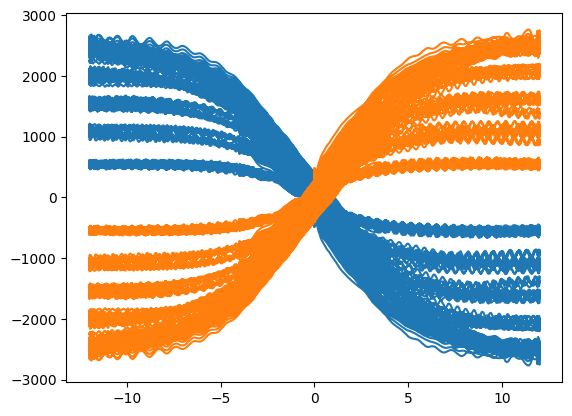

In [27]:
plt.plot(test_dat.data[:,test_dat.channels.index('SA')],test_dat.data[:,test_dat.channels.index('FY')])
plt.plot(test_dat.data[:,test_dat_copy.channels.index('SA')],test_dat_copy.data[:,test_dat.channels.index('FY')])
plt.show()

In [29]:
test_dat_copy2 = ConventionConverter.convert_convention(test_dat,'SAE')
test_dat_copy2

dataset(path=WindowsPath('../data/B2356raw12.dat'), name='B2356raw12', channels=['ET', 'V', 'N', 'SA', 'IA', 'RL', 'RE', 'P', 'FX', 'FY', 'FZ', 'MX', 'MZ', 'NFX', 'NFY', 'RST', 'TSTI', 'TSTC', 'TSTO', 'AmbTmp', 'SR', 'SL', 'CmdV', 'CmdP', 'CmdFZ', 'CmdIA', 'CmdSA'], units=['s', 'kph', 'rpm', 'deg', 'deg', 'cm', 'cm', 'kPa', 'N', 'N', 'N', 'Nm', 'Nm', 'none', 'none', 'deg c', 'deg c', 'deg c', 'deg c', 'deg c', 'SAE', 'kph', 'kPa', 'N', 'deg', 'deg'], unit_types=['time', 'speed', 'rotational_speed', 'angle', 'angle', 'length', 'length', 'pressure', 'force', 'force', 'force', 'torque', 'torque', 'none', 'none', 'temperature', 'temperature', 'temperature', 'temperature', 'temperature', 'none', 'none', 'none', 'none', 'none', 'none', 'none'], data=array([[ 0.000000e+00,  2.000000e-02, -5.000000e-02, ..., -1.112100e+03,
         0.000000e+00,  0.000000e+00],
       [ 1.000000e-02,  1.000000e-02, -1.200000e-01, ..., -1.112100e+03,
         0.000000e+00,  0.000000e+00],
       [ 2.000000e-02,

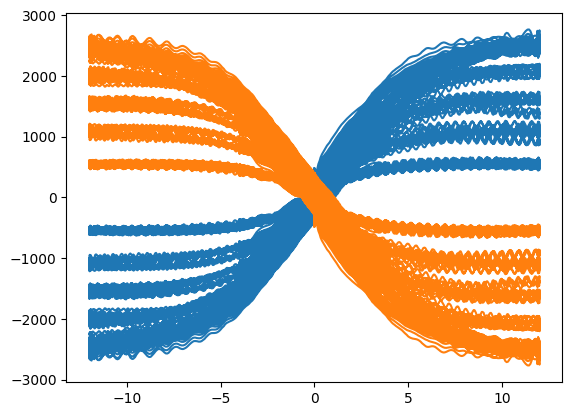

In [30]:
plt.plot(test_dat.data[:,test_dat_copy.channels.index('SA')],test_dat_copy.data[:,test_dat.channels.index('FY')])
plt.plot(test_dat.data[:,test_dat_copy2.channels.index('SA')],test_dat_copy2.data[:,test_dat.channels.index('FY')])
plt.show()

In [75]:
import colorcet as cc

ModuleNotFoundError: No module named 'colorcet'